# Estimating the parameters of a distribution

Consider a dataset consisting of observations from $n$ independent random variables $X_1,...,X_n$, all following the same Bernoulli distribution of an unknown parameter $p$.

We often need to estimate $p$ from the observed values of $X_1,...,X_n$. Formally, we need to find the estimation $\hat{p}$ of the parameter $p$ which maximises the probability of the data $P(X_1,...,X_n|\hat{p})$. This can be expressed as a function of $\hat{p}$ called _likelihood_ and defined simply as $L(\hat{p}|X_1,...,X_n)=P(X_1,...,X_n|\hat{p})$. The estimator that maximizes the likelihood function is called _maximum likelihood estimator_ (MLE) and is denoted as $\hat{p}_\text{MLE}$.

Online resources:
* StatQuest on Maximul Likelihood in general - https://youtu.be/XepXtl9YKwc
* StatQuest on Maximum Likelihood For the Normal Distribution, step-by-step! - https://youtu.be/Dn6b9fCIUpM
* Derivative formulas - https://www.eeweb.com/wp-content/uploads/calculus-derivatives-limits.pdf
* Logarithm properites - https://cdn.eeweb.com/tools/assets/math_help/algebra.pdf
* Help with solving equations and plots - https://www.wolframalpha.com


## Example

An online shop has just updated its website and we want to know the conversion rate after the update (i.e. what is the probability that a visitor will buy before leaving) to see if the new website is performing better or worse than the old version.

The true conversion rate can be considered the unknown parameter $p$ of a Bernoulli distribution, and each visitor a random variable $X_i$ following that distribution. 

Although $p$ cannot be directly observed, we can see which of the $n$ visitors generated a sale; in other words, we can observe the values of each $X_1,...,X_n$.

This can be simulated using the `scipy` package for $n=10$ visitors and a true conversion rate $p=0.7$:

In [1]:
from scipy.stats import bernoulli
X = bernoulli.rvs(p=0.7, size=10, random_state=42)
X

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

Note that although the true conversion rate was set to 0.7, only 6 of the 10 visitors happened to buy, so our observed conversion rate is 0.6.

## Experimental approach

In an initial attempt to estimate the value of the original $p$ from the simulated sample, we can use the fact that $0 \leq p \leq 1$ and perform a simple search to find the candidate $\hat{p}$ which yields the highest likelihood $L(\hat{p})$ given $X=(X_1,...,X_n)$.

The following code tests 100 values of $\hat{p}$ between 0 and 1 and stores in a dictionary the likelihood for each of them. It then returns the key with the maximum value from the dictionary:

In [2]:
import numpy as np
p_hat_range = np.linspace(0, 1, num=100)
L = {p_hat: np.prod([bernoulli.pmf(x, p_hat) for x in X])
     for p_hat in p_hat_range}
p_hat_max = max(L, key=L.get)
p_hat_max

0.595959595959596

It seems that of the 100 the values tested, the maximum likelihood was observed for 0.595959595959596, which is very close to 0.6, our observed conversion rate.

And if we want to plot the likelihood corresponding to each $\hat{p}$:

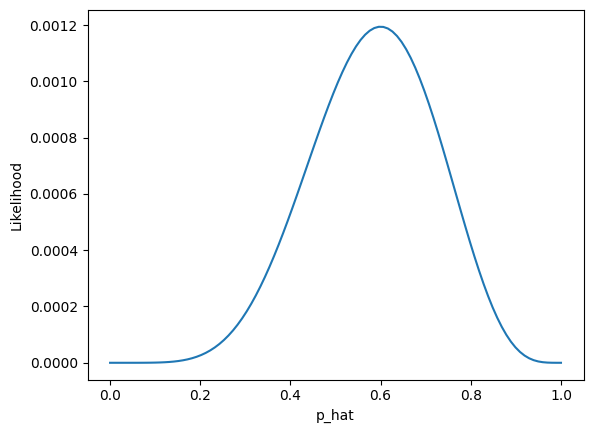

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(p_hat_range, list(L.values()))
ax.set(xlabel='p_hat', ylabel='Likelihood')
plt.show()

Again, we can see that the graph peaks approximately at 0.6.

## Analytical approach

The previous approach gives a fairly good result, but has two obvious problems: it is inefficient and it is inexact.

### Step 1 - find the likelihood function

Instead, we can analytically find the point of maximum for the likelihood $L(\hat{p})$. Considering the general case where the website has a true probability of conversion $p$, and we observe $n$ visitors, out of which $m$ have become customers:

\begin{align}
  L(\hat{p} | X) &= P(X | \hat{p})\\
  &= P(X_1,...,X_n | \hat{p})\\
  &= P(X_1 | \hat{p}) \cdot ... \cdot P(X_n | \hat{p}) \\
  &= \hat{p}^m \cdot (1-\hat{p})^{n-m} \label{mle1}
\end{align}

Finding the maximum for $\hat{p}^m \cdot (1-\hat{p})^{n-m}$ involves taking the derivative. 

### Step 2 - apply the logarithm

However, the derivative of a multiplication is difficult to calculate when there are many factors. A common approach is to use the logarithm of this function, since it reaches maximum in the same point. 

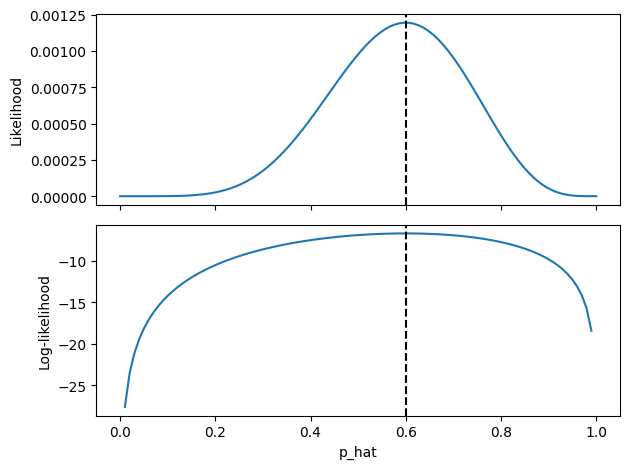

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
X = bernoulli.rvs(p=0.7, size=10, random_state=42)
p_hat_range = np.linspace(0, 1, num=100)
L = {p_hat: np.prod([bernoulli.pmf(x, p_hat) for x in X])
     for p_hat in p_hat_range}
l = np.log(list(L.values())[1:-1])
l = [np.nan] + list(l) + [np.nan]
p_hat_max = max(L, key=L.get)
# Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(p_hat_range, list(L.values()))
ax1.set(ylabel='Likelihood')
ax1.axvline(x=0.6, ls='--', color='black')
ax2.plot(p_hat_range, l)
ax2.set(ylabel='Log-likelihood')
ax2.axvline(x=0.6, ls='--', color='black')
plt.xlabel('p_hat')
plt.show()

This is due to the fact that the logarithm is an increasing function. The logarithm of the function is much easier to differentiate except, of course, in $\hat{p}=0$ and $\hat{p}=1$, where the likelihood is $0$ and the logarithm is not defined. These edge cases can be treated separately as needed. For simplicity, we can call this new function $l(\hat{p})$:

\begin{align}
  l(\hat{p}) &= \ln({L(\hat{p} | X)}) \\
  &= \ln{(\hat{p}^m \cdot (1-\hat{p})^{n-m})}\\
  &= m \ln{(\hat{p})} + (n-m) \ln{(1-\hat{p})}
\end{align}

### Step 3 - find the maximum of the log-likelihood
#### Step 3a - first derivative

The maximum of this function is reached when the first partial derivative with respect to $\hat{p}$ is zero. Although in this case we only have a single variable, we're using partial derivatives to illustrate the general scenario where the distribution can have multiple parameters. So we take the first derivative:


\begin{align}
  \frac{\partial}{\partial{\hat{p}}}l(\hat{p})
  &= \frac{\partial}{\partial{\hat{p}}}(m \ln{\hat{p}})+ \frac{\partial}{\partial{\hat{p}}}((n-m)\ln(1-\hat{p})) \\
  &= m\frac{\partial}{\partial{\hat{p}}}(\ln(\hat{p})) + (n-m)\frac{\partial}{\partial{\hat{p}}}(\ln(1-\hat{p})) \\
  &= m \frac{1}{\hat{p}} + (n-m) \frac{1}{1-\hat{p}}(-1) \\ 
  &= \frac{m}{\hat{p}} + \frac{m-n}{1-\hat{p}}\label{mle2}
\end{align}

#### Step 3b - second derivative

Formally, at this point we have to check that this is indeed a point of maximum and not minimum. This is done by checking the sign of the second derivative:

\begin{align}
   \frac{\partial^2}{\partial{\hat{p}^2}}l(\hat{p})
  &= -\frac{m}{\hat{p}^2}-\frac{n-m}{(1-\hat{p})^2} \label{mle3}
\end{align}

Since both fractions are positive, the overall result must be negative for the entire interval $\hat{p} \in (0,1)$, meaning that the function is concave so its extreme point is indeed a maximum, as expected.

#### Step 3c - find $\hat{p}$ where first derivative is 0

Going back to the equation for $\frac{\partial}{\partial{\hat{p}}}l(\hat{p})$, setting it equal to zero and solving for $\hat{p}$ gives:
\begin{align}
  \frac{m}{\hat{p}} + \frac{m-n}{1-\hat{p}} = 0 
  &\Rightarrow m(1-\hat{p}) = (n-m)\hat{p} \\
  &\Rightarrow \hat{p} = \frac{m}{n}
\end{align}

In our example with $m=6$ customers and $n=10$ visitors, the estimation is exactly $\frac{m}{n}=0.6$, which is the same as the observed conversion. This confirms our previous rough estimations, and is also very intuitive: in the absence of any other details, the best guess for the true conversion is the conversion seen so far.

## Estimating parameters of common distributions with `scipy`

The process above is already implemented in `scipy` for fitting the parameters of usual distributions. The `scipy.stats.bernoulli` distribution is so simple that it doesn't really need it, but distributions like the normal or gamma provide the `fit` function which return the parameters of the distribution using maximum likelihood as detailed above.

For instance, if we want to fit a normal distribution on a dataset representing weights of mice in a lab:

In [5]:
X = np.array([30, 35, 40, 32, 36, 33.5, 34]) # The weights of the mice

we can use `scipy.stats.norm`:

In [6]:
from scipy.stats import norm
mean, stdev = norm.fit(X)
var = stdev**2
print(f"mean: {mean}\nvariance: {var}")

mean: 34.357142857142854
variance: 8.622448979591839


If we were to solve this using the analytic version, we would get:

$$
\mu_{MLE} = \frac{1}{n} \sum_{i=1}^nx_i\\
\sigma^2_{MLE} = \frac{1}{n}\sum_{i=1}^n(x_i-\mu_{MLE})^2
$$

and if we calculate these for our dataset, we have:

In [7]:
mean1= X.mean()
var1 = X.var()
print(f"mean: {mean1}\nvariance: {var1}")

mean: 34.357142857142854
variance: 8.622448979591839


which is identical to the results of calling `fit()`.

To visualise this, we can use `matplotlib` and the `rvs` function:

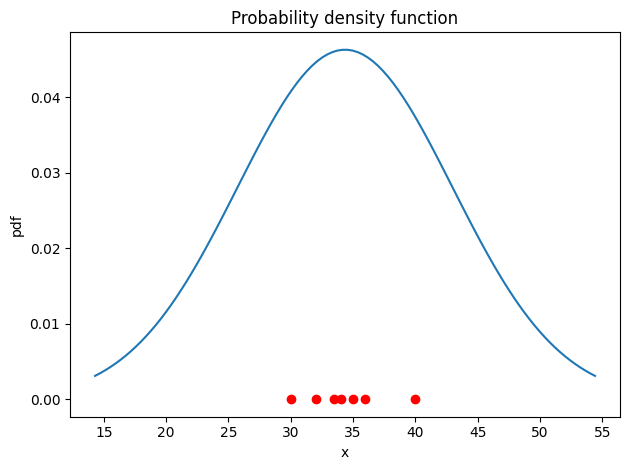

In [8]:
from scipy.stats import norm
import numpy as np
x = np.linspace(norm.ppf(0.01, mean, var), norm.ppf(0.99, mean, var), 100)
pdf_X = norm.pdf(x, mean, var)

fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf_X)
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.scatter(X, np.zeros_like(X), color='r')
plt.show()